In [515]:
import numpy as np
import matplotlib.pyplot as plt
from   astropy.table     import Table


In [543]:
import pubplot

In [516]:
fpath = '/cosma/home/durham/dc-moor2/data/desi_gold.fits'
dat = Table.read(fpath)

'''
dat = dat[0:1000]

fpath = fpath.replace('desi_gold', 'desi_gold_dryrun')
dat.write(fpath)

'''

"\ndat = dat[0:1000]\n\nfpath = fpath.replace('desi_gold', 'desi_gold_dryrun')\ndat.write(fpath)\n\n"

In [517]:
np.unique(dat['MORPHTYPE'])

DEV
EXP
PSF
REX
SER


In [518]:
dat_gm = dat[dat['GOOD_MATCH'] == True]


In [519]:
dat_dev = dat[dat['MORPHTYPE'] == 'DEV']
dat_exp = dat[dat['MORPHTYPE'] == 'EXP']
dat_rex = dat[dat['MORPHTYPE'] == 'REX']
dat_psf = dat[dat['MORPHTYPE'] == 'PSF']

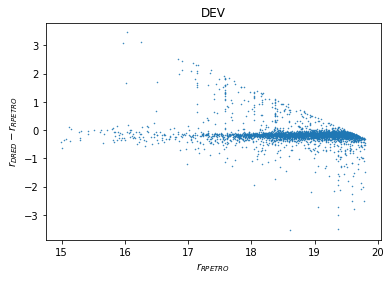

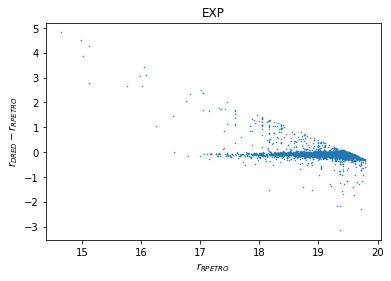

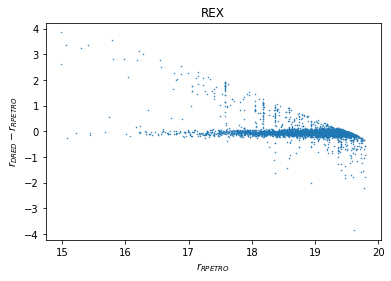

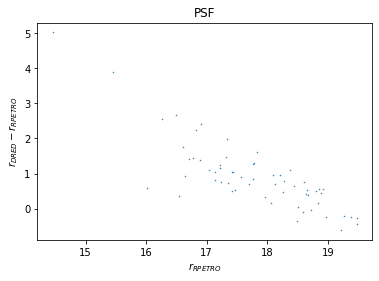

In [520]:
plt.scatter(dat_dev['R_PETRO'], dat_dev['RMAG_DRED'] - dat_dev['R_PETRO'], s=0.25)
plt.xlabel(r'$r_{R PETRO}$')
plt.ylabel(r'$r_{DRED} - r_{R PETRO}$')
plt.title('DEV')
plt.show()

plt.scatter(dat_exp['R_PETRO'],  dat_exp['RMAG_DRED'] - dat_exp['R_PETRO'], s=0.25)
plt.xlabel(r'$r_{R PETRO}$')
plt.ylabel(r'$r_{DRED} - r_{R PETRO}$')
plt.title('EXP')
plt.show()

plt.scatter(dat_rex['R_PETRO'],  dat_rex['RMAG_DRED'] - dat_rex['R_PETRO'], s=0.25)
plt.xlabel(r'$r_{R PETRO}$')
plt.ylabel(r'$r_{DRED} - r_{R PETRO}$')
plt.title('REX')
plt.show()

plt.scatter(dat_psf['R_PETRO'],  dat_psf['RMAG_DRED'] - dat_psf['R_PETRO'], s=0.25)
plt.xlabel(r'$r_{R PETRO}$')
plt.ylabel(r'$r_{DRED} - r_{R PETRO}$')
plt.title('PSF')
plt.show()

In [528]:
np.unique(dat_gm['MORPHTYPE'])

DEV
EXP
PSF
REX
SER


Text(0.5, 0, '$r_{PETRO}$')

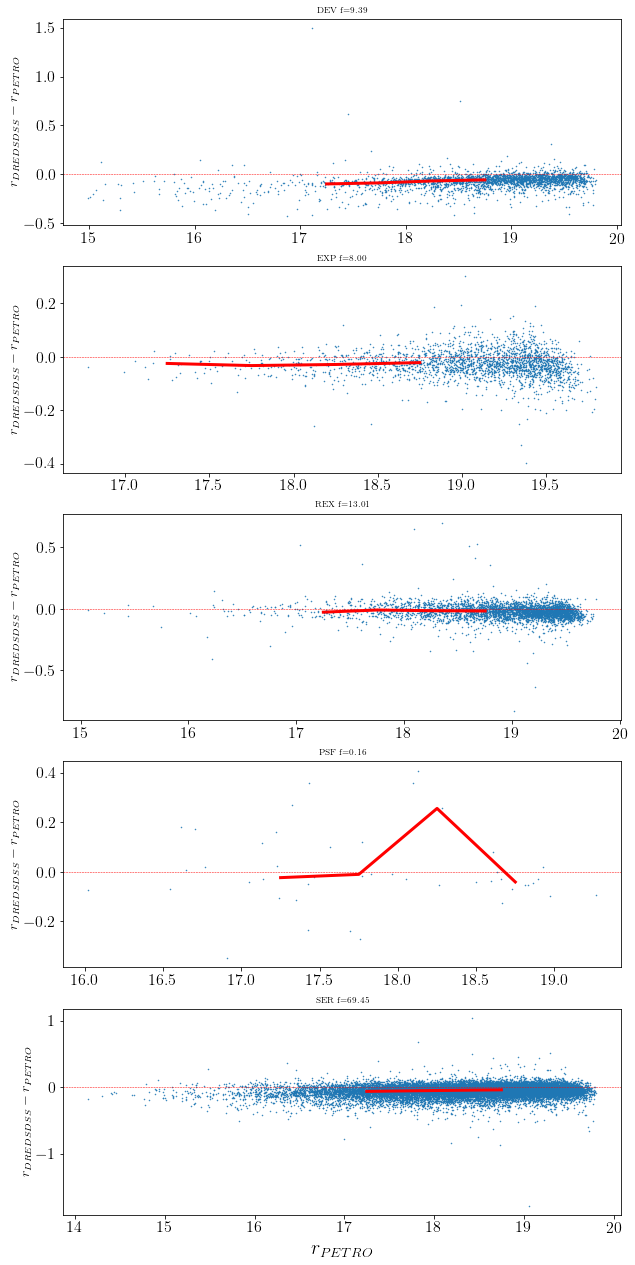

In [546]:
figure_mosaic = '''
00
11
22
33
44
'''

fig, axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10,22))

# TODO: change to np.unique()
morphtypes = ['DEV', 'EXP', 'REX', 'PSF', 'SER']

for label, ax in axes.items():
    morphtype = morphtypes[int(label)]
    dat_type = dat_gm[dat_gm['MORPHTYPE'] == morphtype]
    
    f_match = 100. * np.mean(dat_gm['MORPHTYPE'] == morphtype)

    
    # calculate median offset by bin
    bins = np.arange(17, 19.5, 0.5)
    centres = (bins[:-1] + bins[1:]) / 2

    digitise = np.digitize(dat_type['R_PETRO'], bins=bins)
    bin_median = []

    for idx in np.unique(digitise):

        bin_petro = dat_type['R_PETRO'][digitise==idx]
        bin_dred = dat_type['RMAG_DRED_SDSS'][digitise==idx]

        bin_median.append(np.median(bin_dred - bin_petro))
        
    #ax.text(0.05, 0.05, 'f = {:.2f}'.format(f_match))
    ax.set_ylabel(r'$r_{DRED SDSS} - r_{PETRO}$', fontsize=14)
    ax.set_title(morphtype + ' f={:.2f}'.format(f_match), fontsize=9)
    ax.axhline(0, ls='--', color='r', linewidth=0.5)
    ax.scatter(dat_type['R_PETRO'], dat_type['RMAG_DRED_SDSS'] - dat_type['R_PETRO'], s=0.25)
    
    ax.plot(centres, bin_median[1:-1], color='r')
    
ax.set_xlabel(r'$r_{PETRO}$')

Text(0.5, 0, '$r_{PETRO}$')

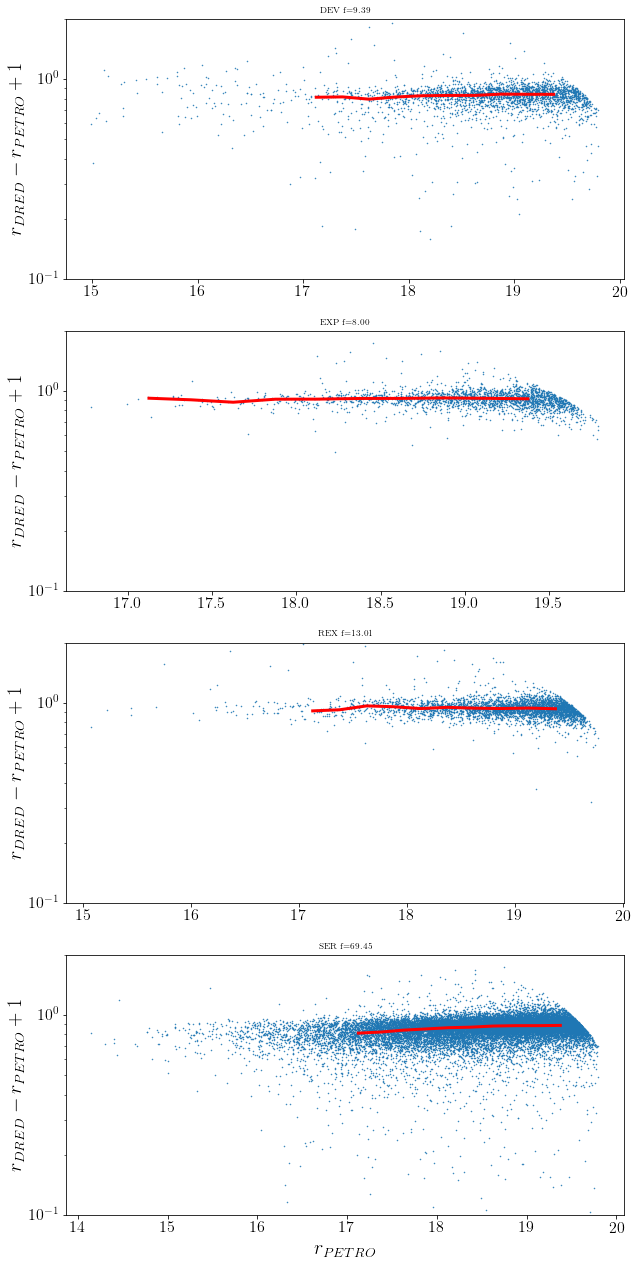

In [572]:
figure_mosaic = '''
00
11
22
33
'''

fig, axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10,22))

# TODO: change to np.unique()
morphtypes = ['DEV', 'EXP', 'REX', 'SER']

for label, ax in axes.items():
    morphtype = morphtypes[int(label)]
    dat_type = dat_gm[dat_gm['MORPHTYPE'] == morphtype]
    
    f_match = 100. * np.mean(dat_gm['MORPHTYPE'] == morphtype)

    # calculate median offset by bin
    bins = np.arange(17.0, 19.51, 0.25)
    centres = (bins[:-1] + bins[1:]) / 2

    digitise = np.digitize(dat_type['R_PETRO'], bins=bins)
    bin_median = []

    for idx in np.unique(digitise):

        bin_petro = dat_type['R_PETRO'][digitise==idx]
        bin_dred = dat_type['RMAG_DRED'][digitise==idx]

        bin_median.append(np.median(bin_dred - bin_petro)+1)
        
    #ax.text(0.05, 0.05, 'f = {:.2f}'.format(f_match))
    ax.set_ylabel(r'$r_{DRED} - r_{PETRO} + 1$')
    ax.set_title(morphtype + ' f={:.2f}'.format(f_match), fontsize=9)
    ax.axhline(0, ls='--', color='r', linewidth=0.5)
    ax.scatter(dat_type['R_PETRO'], dat_type['RMAG_DRED'] - dat_type['R_PETRO']+1, s=0.25)
    
    ax.plot(centres, bin_median[1:-1], color='r')
    ax.set_yscale('log')
    ax.set_ylim(0.1, 2)
ax.set_xlabel(r'$r_{PETRO}$')

In [504]:
sorted(dat.dtype.names)

['BGS_TARGET',
 'BIN_MEDIUM',
 'BRICKID',
 'BRICKNAME',
 'BRICK_OBJID',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'CATAID',
 'CHI2',
 'COADD_EXPTIME',
 'COADD_FIBERSTATUS',
 'COADD_NUMEXP',
 'COADD_NUMNIGHT',
 'COADD_NUMTILE',
 'COEFF',
 'DEC',
 'DELTACHI2',
 'DESI_TARGET',
 'DETMAG',
 'DETMAG_1',
 'DETMAG_2',
 'DISTMOD',
 'DISTMOD_1',
 'DISTMOD_2',
 'EBV',
 'FA_TARGET',
 'FA_TYPE',
 'FIBERFLUX_G',
 'FIBERFLUX_R',
 'FIBERFLUX_Z',
 'FIBERTOTFLUX_G',
 'FIBERTOTFLUX_R',
 'FIBERTOTFLUX_Z',
 'FLUX_G',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_Z',
 'FLUX_R',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_Z',
 'GAIA_PHOT_BP_MEAN_MAG',
 'GAIA_PHOT_G_MEAN_MAG',
 'GAIA_PHOT_RP_MEAN_MAG',
 'GAMA_FIELD',
 'GAMA_SEP',
 'GMAG_DRED',
 'GMAG_DRED_SDSS',
 'GMR',
 'GOOD_MATCH',
 'GOOD_Z',
 'IMAG_DRED_SDSS',
 'IN_GOLD',
 'LUMDIST_1',
 'LUMDIST_2',
 'MASKBITS',
 'MEAN_DELTA_X',
 'MEAN_DELTA_Y',
 'MEAN_FIBER_DEC',
 'MEAN_FIBER_RA',
 'MEAN_PSF_TO_FIBER_SPECFLUX',
 'MORPHTYPE',
 'M

In [505]:
dat['SERSIC']

5.0892467
1.0
4.690599
2.3193724
6.0
4.0
4.0
4.0
1.0
3.3382666
2.9429424


In [234]:
dat_gm['MORPHTYPE'][dat_gm['MORPHTYPE'] == 'REX']

REX
REX
REX
REX
REX
REX
REX
REX
REX
REX
REX


In [220]:
dat_gm = dat[(dat['GOOD_MATCH'].data == True) &  (dat['TARGETID'].data != 999999)]

In [221]:
np.unique(dat_gm['MORPHTYPE'].data, return_counts=True)

(array([b'DEV', b'EXP', b'PSF', b'REX', b'SER'], dtype='|S4'),
 array([1705,  982,   69, 1583, 8415]))

In [225]:
frac_dev = len(dat_gm[dat_gm['MORPHTYPE'] == 'DEV'])
frac_exp = len(dat_gm[dat_gm['MORPHTYPE'] == 'EXP'])
frac_na = len(dat_gm[dat_gm['MORPHTYPE'] == 'N/A'])
frac_psf = len(dat_gm[dat_gm['MORPHTYPE'] == 'PSF'])
frac_rex = len(dat_gm[dat_gm['MORPHTYPE'] == 'REX'])
frac_ser = len(dat_gm[dat_gm['MORPHTYPE'] == 'SER'])

frac_all = len(dat_gm)

print(frac_dev / frac_all * 100.)
print(frac_exp / frac_all * 100.)
print(frac_na / frac_all * 100.)
print(frac_psf / frac_all * 100.)
print(frac_rex / frac_all * 100.)
print(frac_ser / frac_all * 100.)

13.368355025874234
7.6995452407087965
0.0
0.5410067429825938
12.411792378861533
65.97930061157284


In [226]:
len(dat_gm)

12754

In [219]:
dat_gm[dat_gm['MORPHTYPE'] == 'N/A']

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,ROTCARTESIAN_X,ROTCARTESIAN_Y,ROTCARTESIAN_Z,GMR_1,DETMAG,TARGETID,CHI2,COEFF [10],ZERR,ZWARN,NPIXELS,SPECTYPE,SUBTYPE,NCOEFF,DELTACHI2,COADD_FIBERSTATUS,TARGET_RA,TARGET_DEC,PMRA,PMDEC,REF_EPOCH,FA_TARGET,FA_TYPE,OBJTYPE,SUBPRIORITY,OBSCONDITIONS,RELEASE,BRICKID,BRICK_OBJID,MORPHTYPE,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MASKBITS,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,PARALLAX,BRICKNAME,EBV,FLUX_W1,FLUX_W2,FLUX_IVAR_W1,FLUX_IVAR_W2,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,SERSIC,SHAPE_R,SHAPE_E1,SHAPE_E2,PHOTSYS,PRIORITY_INIT,NUMOBS_INIT,SV3_DESI_TARGET,SV3_BGS_TARGET,SV3_MWS_TARGET,SV3_SCND_TARGET,DESI_TARGET,BGS_TARGET,MWS_TARGET,PLATE_RA,PLATE_DEC,COADD_NUMEXP,COADD_EXPTIME,COADD_NUMNIGHT,COADD_NUMTILE,MEAN_DELTA_X,RMS_DELTA_X,MEAN_DELTA_Y,RMS_DELTA_Y,MEAN_FIBER_RA,STD_FIBER_RA,MEAN_FIBER_DEC,STD_FIBER_DEC,MEAN_PSF_TO_FIBER_SPECFLUX,ROS,ROS_DIST,GOOD_Z,ZDESI,GAMA_FIELD,GMAG_DRED,RMAG_DRED,GMR_2,DESI_SEP,GOOD_MATCH
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,mag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes3,float64,float64,float64,float32,float32,int64,float64,float64,float64,int64,int64,bytes6,bytes20,int64,float64,int32,float64,float64,float32,float32,float32,int64,uint8,bytes3,float64,int32,int16,int32,int32,bytes4,float32,float32,float32,float32,float32,float32,int16,int64,bytes2,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes1,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,int16,float32,int16,int16,float32,float32,float32,float32,float64,float32,float64,float32,float32,int64,float64,bool,float64,bytes3,float32,float32,float32,float64,bool
47300,587722982291013844,212.15205384,-0.82047439,18.703968,0.16989,4,G15_Y1_AS1_104,6,20.529139,19.370903,18.657894,18.179806,17.94235,576.043648073589,38.802276960512884,G15,419.0136029974577,258.49748652829186,-7.470933138402203,0.7130089,18.703968,999999,1e+20,1e+20 .. 1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,1e+20,1e+20,1e+20,1e+20,1e+20,999999,63,N/A,1e+20,999999,16959,999999,999999,N/A,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,16959,999999,N/,1e+20,1e+20,1e+20,1e+20,N/A,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,N,999999,999999,999999,999999,999999,999999,999999,999999,999999,1e+20,1e+20,16959,1e+20,16959,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,999999,0.6843815861637373,True,1e+20,N/A,1e+20,1e+20,1e+20,0.08179898605287898,True
585424,588848899913875592,182.68238058,-0.20290665,18.203474,0.11564,4,2dF296492,6,19.762941,18.49634,17.806082,17.39633,17.018105,378.12431794256514,37.88817304310275,G12,338.67682280754246,13.017272394685317,-1.5398678432962836,0.690258,18.203474,999999,1e+20,1e+20 .. 1e+20,1e+20,999999,999999,N/A,N/A,999999,1e+20,999999,1e+20,1e+20,1e+20,1e+20,1e+20,999999,63,N/A,1e+20,999999,16959,999999,999999,N/A,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,16959,999999,N/,1e+20,1e+20,1e+20,1e+20,N/A,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,N,999999,999999,999999,999999,999999,999999,999999,999999,999999,1e+20,1e+20,16959,1e+20,16959,16959,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,1e+20,999999,0.4643020132110816,True,1e+20,N/A,1e+20,1e+20,1e+20,0.07236856629576699,True
560916,588848899376808117,182.24707858,-0.59332801,18.487597,0.18476,4,G12_Y1_GS1_264,6,21.506737,19.712591,18.435965,17.980734,17.682676,632.4455745915498,39.0051157901755,G12,533.52955726055,16.4483178430117,-6.0628

In [128]:
# TODO: ADD to proper docs/nb
# V (COMPLETENESS>0.8) / V plot

# currently reading in older file
dat = Table.read('/cosma/home/durham/dc-moor2/data/v1/gama_gold_ddp_n8.fits')

In [144]:
dat = Table.read('/cosma/home/durham/dc-moor2/data/v1/gama_gold_zmax.fits')

In [145]:
dat.dtype.names

('CATAID',
 'OBJID',
 'RA',
 'DEC',
 'R_PETRO',
 'ZGAMA',
 'NQ',
 'SPECID',
 'SURVEY_CLASS',
 'UMAG_DRED_SDSS',
 'GMAG_DRED_SDSS',
 'RMAG_DRED_SDSS',
 'IMAG_DRED_SDSS',
 'ZMAG_DRED_SDSS',
 'LUMDIST',
 'DISTMOD',
 'FIELD',
 'CARTESIAN_X',
 'CARTESIAN_Y',
 'CARTESIAN_Z',
 'ROTCARTESIAN_X',
 'ROTCARTESIAN_Y',
 'ROTCARTESIAN_Z',
 'GMR',
 'REST_GMR_0P1',
 'REST_GMR_0P1_WARN',
 'REST_GMR_0P1_INDEX',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'Q_COLOR_0P0',
 'EQ_ALL_0P0',
 'EQ_COLOR_0P0',
 'MALL_0P0',
 'MCOLOR_0P0',
 'Z_THETA_QALL',
 'Z_THETA_QCOLOR',
 'DDPKCORR_R0P1',
 'DDPKCORR_G0P1',
 'DDPKCORR_R0P0',
 'DDPKCORR_G0P0',
 'DDPMALL_0P0',
 'DELTA_RPETRO_FAINT',
 'ZMAX',
 'ZMAX_WARN',
 'DELTA_RPETRO_BRIGHT',
 'ZMIN',
 'ZMIN_WARN')

In [240]:
fpath = '/cosma/home/durham/dc-moor2/data/gama_desi.fits'
dat = Table.read(fpath)

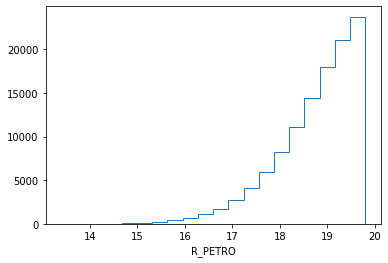

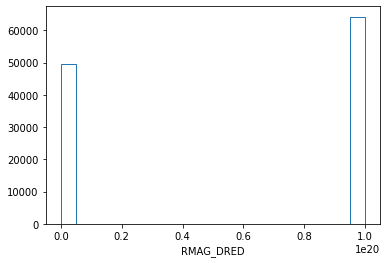

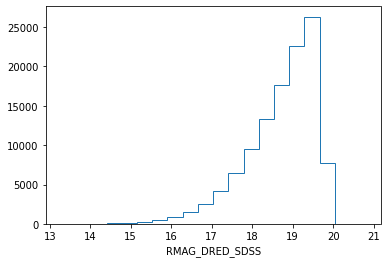

In [246]:
plt.hist(dat['R_PETRO'], bins=20, histtype='step')
plt.xlabel('R_PETRO')
plt.show()

plt.hist(dat['RMAG_DRED'], bins=20, histtype='step')
plt.xlabel('RMAG_DRED')
plt.show()

plt.hist(dat['RMAG_DRED_SDSS'], bins=20, histtype='step')
plt.xlabel('RMAG_DRED_SDSS')
plt.show()

In [255]:
dat = dat[dat['TARGETID'] != 999999]

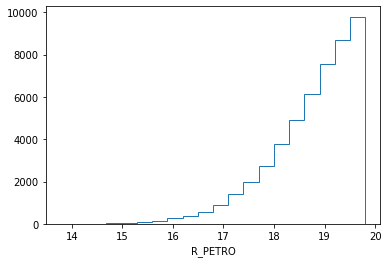

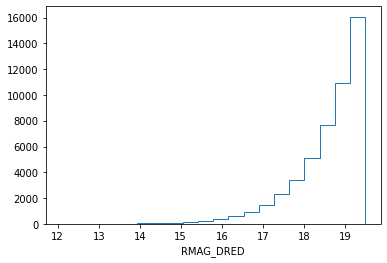

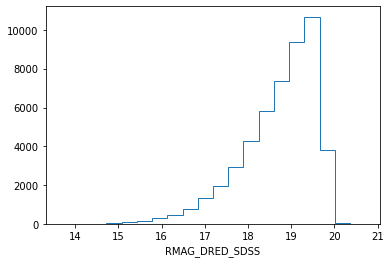

In [257]:
plt.hist(dat['R_PETRO'], bins=20, histtype='step')
plt.xlabel('R_PETRO')
plt.show()

plt.hist(dat['RMAG_DRED'], bins=20, histtype='step')
plt.xlabel('RMAG_DRED')
plt.show()

plt.hist(dat['RMAG_DRED_SDSS'], bins=20, histtype='step')
plt.xlabel('RMAG_DRED_SDSS')
plt.show()